读取数据

In [161]:
import pandas as pd
import numpy as np

data = pd.read_csv('insurance.csv')
data.head(n=6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


EDA数据探索


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

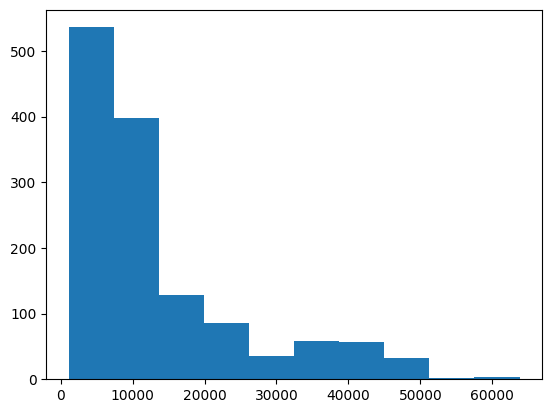

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(data['charges'])

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <BarContainer object of 10 artists>)

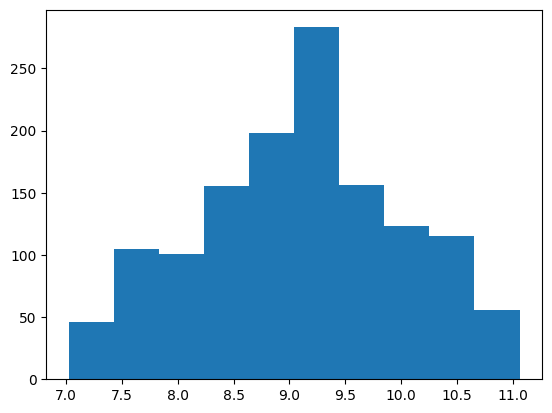

In [163]:
#线性回归 前提是假设y成正态分布
plt.hist(np.log(data['charges']))

特征工程

In [164]:
#特征中的 ‘sex’ ‘smoker’ ‘region’ 都是字符串 要数值化  （有很多方法比如 独热编码 one-hot code）
data = pd.get_dummies(data)
data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [165]:
x = data.drop('charges', axis=1)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [166]:
y = data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [167]:
#处理空值
x.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [168]:
#划分训练集测试集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [169]:
#标准归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True).fit(x_train)

x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [170]:
#多项式回归 升高维度 （因为不知道 这个数据是不是线性的）
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_test_scaler = poly_features.fit_transform(x_test_scaler)
x_train_scaler = poly_features.fit_transform(x_train_scaler)

模型训练

In [171]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
reg = LinearRegression()

reg.fit(x_train_scaler, np.log1p(y_train))
y_predict = reg.predict(x_test_scaler)

In [172]:
Ridge = Ridge(alpha=0.4)
Ridge.fit(x_train_scaler, np.log1p(y_train))
y_predict_ridge = Ridge.predict(x_test_scaler)

In [173]:
gboost = GradientBoostingRegressor()
gboost.fit(x_train_scaler, np.log1p(y_train))
y_predict_boost = gboost.predict(x_test_scaler)

模型评估

In [174]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=reg.predict(x_train_scaler)))
np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict))

0.3726583496572988

In [175]:
#reg的rmse
log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=reg.predict(x_train_scaler)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict))
rmse_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(reg.predict(x_train_scaler))))
rmse_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(reg.predict(x_test_scaler))))

log_rmse_train, log_rmse_test, rmse_train, rmse_test

(0.3631259504583041, 0.3726583496572988, 5010.174514689315, 5237.805738732161)

In [176]:
#GradientBoostingRegressor
log_rmse_train = np.sqrt(mean_squared_error(y_true=np.log1p(y_train), y_pred=reg.predict(x_train_scaler)))
log_rmse_test = np.sqrt(mean_squared_error(y_true=np.log1p(y_test), y_pred=y_predict_boost))
rmse_train = np.sqrt(mean_squared_error(y_true=y_train, y_pred=np.exp(gboost.predict(x_train_scaler))))
rmse_test = np.sqrt(mean_squared_error(y_true=y_test, y_pred=np.exp(gboost.predict(x_test_scaler))))

log_rmse_train, log_rmse_test, rmse_train, rmse_test

(0.3631259504583041, 0.3838196749330755, 3642.176940755548, 4711.993170381222)